In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_array = cv2.imread("/kaggle/input/face-expression-recognition-dataset/images/train/surprise/9818.jpg")

In [3]:
img_array.shape

(48, 48, 3)

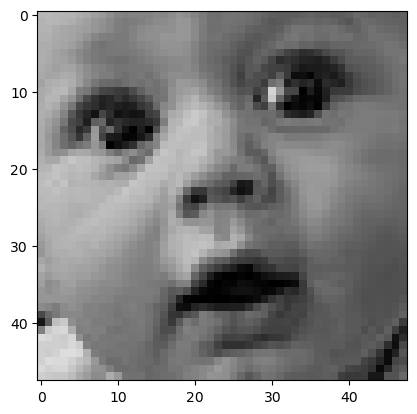

In [4]:
plt.imshow(img_array)

In [5]:
DatasetDirectory = "/kaggle/input/face-expression-recognition-dataset/images/train/"
Classes = ["surprise","sad","happy","disgust","neutral","fear","angry"]

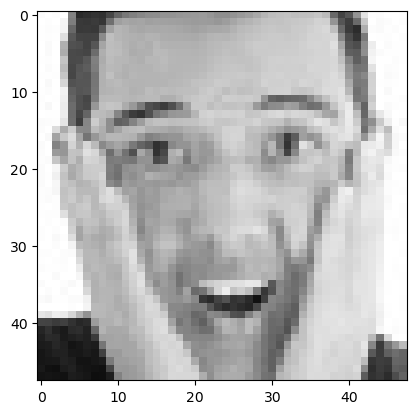

In [6]:
for category in Classes:
    path = os.path.join(DatasetDirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        #backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

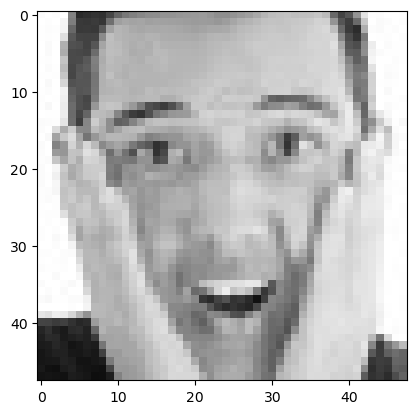

In [7]:
img_size = 224
new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
plt.show()

In [8]:
new_array.shape

(224, 224, 3)

# read all the images and converting them to array

In [9]:
training_data = []

def create_training_data():
    for category in Classes:
        path = os.path.join(DatasetDirectory, category)
        class_num = Classes.index(category) ## Label
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (img_size,img_size))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

In [10]:
create_training_data()

In [11]:
print(len(training_data))
temp = np.array(training_data)
temp.shape

28821


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


(28821, 2)

In [12]:
import random

random.shuffle(training_data)

In [13]:
X = []
Y = []

for features,label in training_data:
    X.append(features)
    Y.append(label)
    
    
X = np.array(X).reshape(-1, img_size, img_size, 3) 

In [14]:
X.shape

(28821, 224, 224, 3)

In [15]:
y = np.array(Y)

In [16]:
y.shape

(28821,)

## Transfer Learning

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [18]:
model = tf.keras.applications.MobileNetV2()

14536120/14536120 [==============================] - 0s 0us/step


In [19]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [20]:
base_input = model.layers[0].input
base_ouput = model.layers[-2].output
base_ouput

final_output = layers.Dense(128)(base_ouput)
final_ouput = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_ouput = layers.Activation('relu')(final_output)
final_output = layers.Dense(7,activation='softmax')(final_ouput)

In [21]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [22]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [23]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [24]:
new_model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [25]:
new_model.fit(X,y,epochs = 1)
new_model.save("my_model_test.h5")

901/901 [==============================] - 3349s 4s/step - loss: 1.2763 - accuracy: 0.5215


In [26]:
new_model.save("my_model_test.h5")

In [27]:
new_model = tf.keras.models.load_model("my_model_test.h5")

In [28]:
TestingDataDirectory = "/kaggle/input/face-expression-recognition-dataset/images/validation/"
testing_data = []

def create_testing_data():
    for category in Classes:
        path = os.path.join(TestingDataDirectory, category)
        class_num = Classes.index(category) ## Label
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (img_size,img_size))
                print(img_array)
                testing_data.append([new_array,class_num])
            except Exception as e:
                pass

In [29]:
create_testing_data()

[[[255 255 255]
  [252 252 252]
  [249 249 249]
  ...
  [224 224 224]
  [252 252 252]
  [252 252 252]]

 [[253 253 253]
  [255 255 255]
  [232 232 232]
  ...
  [204 204 204]
  [232 232 232]
  [255 255 255]]

 [[253 253 253]
  [247 247 247]
  [218 218 218]
  ...
  [195 195 195]
  [213 213 213]
  [244 244 244]]

 ...

 [[223 223 223]
  [206 206 206]
  [128 128 128]
  ...
  [141 141 141]
  [ 62  62  62]
  [ 28  28  28]]

 [[183 183 183]
  [223 223 223]
  [161 161 161]
  ...
  [122 122 122]
  [ 29  29  29]
  [ 31  31  31]]

 [[181 181 181]
  [183 183 183]
  [192 192 192]
  ...
  [ 92  92  92]
  [  9   9   9]
  [ 44  44  44]]]
[[[ 31  31  31]
  [ 37  37  37]
  [ 42  42  42]
  ...
  [ 64  64  64]
  [ 74  74  74]
  [ 76  76  76]]

 [[ 29  29  29]
  [ 38  38  38]
  [ 48  48  48]
  ...
  [ 75  75  75]
  [ 73  73  73]
  [ 82  82  82]]

 [[ 31  31  31]
  [ 41  41  41]
  [ 54  54  54]
  ...
  [ 86  86  86]
  [ 69  69  69]
  [ 85  85  85]]

 ...

 [[132 132 132]
  [125 125 125]
  [100 100 100]
  ..

In [30]:
X_test = []
Y_test = []

for features,label in testing_data:
    X_test.append(features)
    Y_test.append(label)

In [31]:
X_test = np.array(X_test).reshape(-1, img_size, img_size, 3) 

In [32]:
y_test = np.array(Y_test)

In [33]:
new_model.evaluate(X_test, y_test, batch_size = 128)

56/56 [==============================] - 188s 3s/step - loss: 2.8791 - accuracy: 0.3899


[2.8791415691375732, 0.3898952603340149]